# Reconhecimento de texto manuscrito - testando o modelo

In [1]:
try:
    import google.colab
    IN_COLAB = True
    print("Executando no Google Colab")
except ImportError:
    IN_COLAB = False
    print("Não executando no Google Colab")

Não executando no Google Colab


In [2]:
if IN_COLAB:
    # Baixar imagens para o laboratório.
    !wget https://github.com/fabiobento/ocr-sis-emb-2024-2/raw/refs/heads/main/imagens.zip
    !unzip -n -q imagens.zip

# Importando as bibliotecas

In [3]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
if IN_COLAB:
    from google.colab.patches import cv2_imshow
else:
    %pip install imutils==0.5.4
    import imutils

2024-09-28 15:01:02.190582: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-28 15:01:02.200222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 15:01:02.211191: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 15:01:02.214289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 15:01:02.222578: I tensorflow/core/platform/cpu_feature_guar

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Definir função para exibição de imagens
def imshow(imagem):
    if IN_COLAB:
        cv2_imshow(imagem)
    else:
        # Exibir a imagem com matplotlib
        if len(imagem.shape) == 2:  # Se a imagem tiver apenas 2 dimensões (níveis de cinza)
            plt.imshow(imagem, cmap='gray')
            plt.axis('off')  # Oculta os eixos
            plt.show()               
        else:
            plt.imshow(imagem)        
            plt.axis('off')  # Oculta os eixos
            plt.show()   

# Carregando a rede neural

In [5]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    rede_neural = load_model('/content/drive/MyDrive/sistemas_embarcados/rede_neural.keras')
    !cp /content/drive/MyDrive/sistemas_embarcados/rede_neural.keras rede_neural.keras

rede_neural = load_model('rede_neural.keras')
  
rede_neural.summary()

I0000 00:00:1727535664.245603   12479 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727535664.255637   12479 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727535664.262779   12479 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727535664.273269   12479 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 415,406 (1.58 MB)

 Trainable params: 138,468 (540.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276,938 (1.06 MB)

# Carregando a imagem de teste

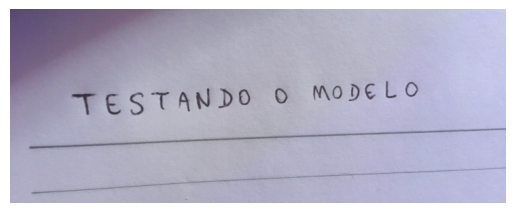

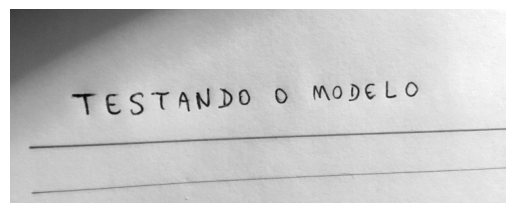

In [6]:
img = cv2.imread('./Imagens/teste-manuscrito01.jpg')
imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

# Pré-processamento da imagem

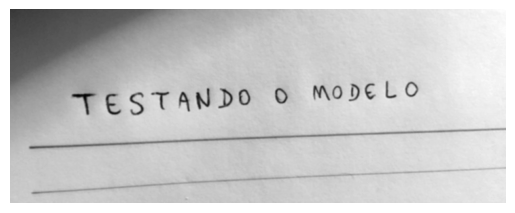

In [7]:
desfoque = cv2.GaussianBlur(gray, (3,3), 0)
imshow(desfoque)

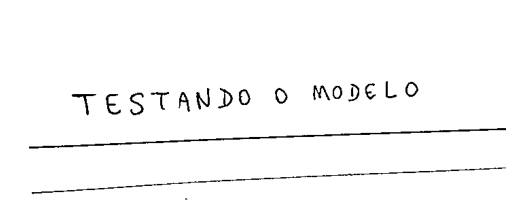

In [8]:
adapt_media = cv2.adaptiveThreshold(desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
imshow(adapt_media)

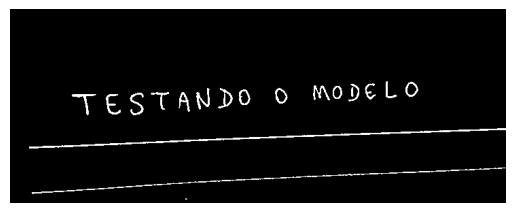

In [9]:
inv = 255 - adapt_media
imshow(inv)

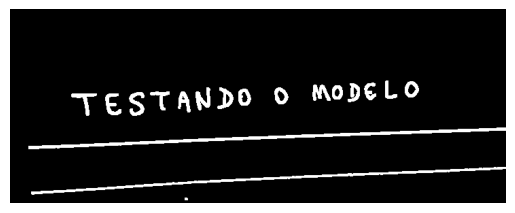

In [10]:
dilatado = cv2.dilate(inv, np.ones((3,3)))
imshow(dilatado)

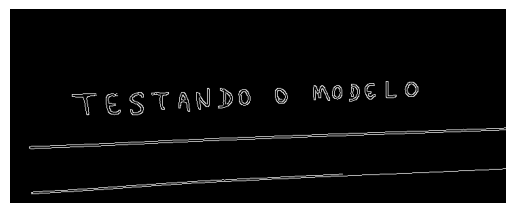

In [11]:
bordas = cv2.Canny(desfoque, 40, 150)
imshow(bordas)

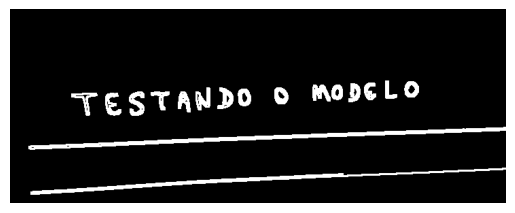

In [12]:
dilatado = cv2.dilate(bordas, np.ones((3,3)))
imshow(dilatado)

# Detecção de contornos

In [13]:
def encontrar_contornos(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]
  return conts

In [14]:
conts = encontrar_contornos(dilatado.copy())

In [15]:
conts

(array([[[726, 173]],
 
        [[725, 174]],
 
        [[700, 174]],
 
        [[699, 175]],
 
        [[671, 175]],
 
        [[670, 176]],
 
        [[669, 176]],
 
        [[668, 175]],
 
        [[666, 175]],
 
        [[665, 176]],
 
        [[641, 176]],
 
        [[640, 177]],
 
        [[615, 177]],
 
        [[614, 178]],
 
        [[583, 178]],
 
        [[582, 179]],
 
        [[551, 179]],
 
        [[550, 180]],
 
        [[525, 180]],
 
        [[524, 181]],
 
        [[497, 181]],
 
        [[496, 182]],
 
        [[467, 182]],
 
        [[466, 183]],
 
        [[443, 183]],
 
        [[442, 184]],
 
        [[415, 184]],
 
        [[414, 185]],
 
        [[388, 185]],
 
        [[387, 186]],
 
        [[360, 186]],
 
        [[359, 187]],
 
        [[334, 187]],
 
        [[333, 188]],
 
        [[307, 188]],
 
        [[306, 189]],
 
        [[285, 189]],
 
        [[284, 190]],
 
        [[262, 190]],
 
        [[261, 191]],
 
        [[238, 191]],
 
        [[237, 1

In [16]:
l_min, l_max = 4, 160
a_min, a_max = 14, 140

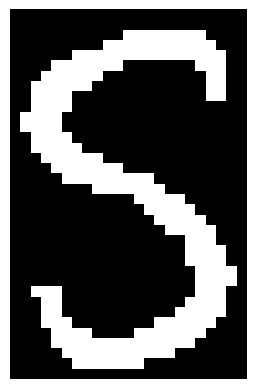

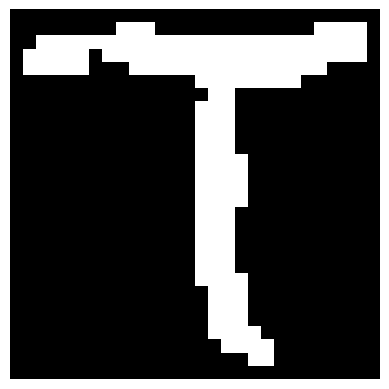

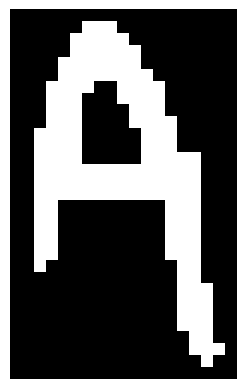

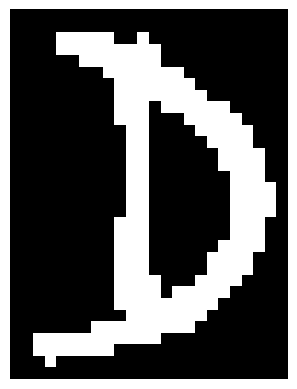

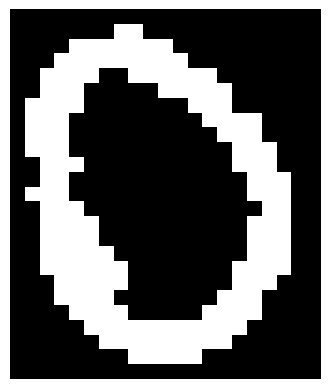

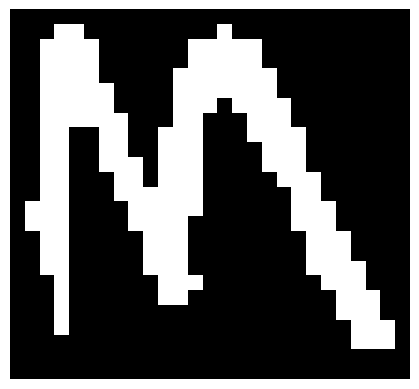

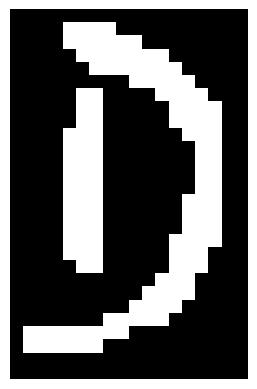

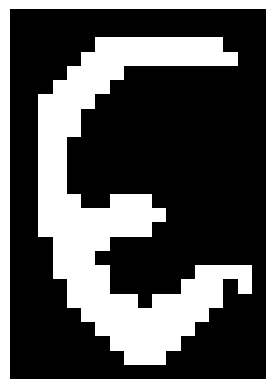

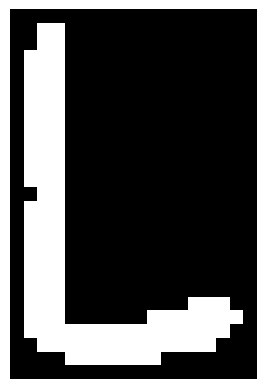

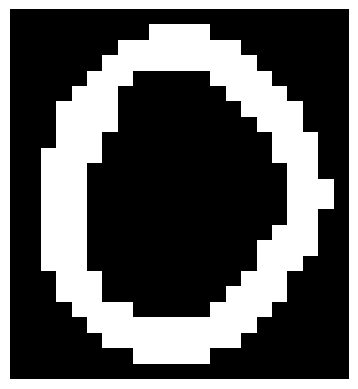

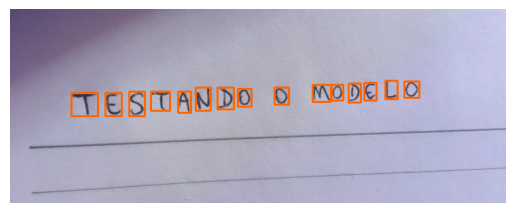

In [17]:
caracteres = []
img_cp = img.copy()
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  #print(x, y, w, h)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    roi = gray[y:y+ h, x:x + w]
    #imshow(roi)
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    imshow(thresh)
    cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
imshow(img_cp)

# Processando os caracteres detectados

## Extração ROI


In [18]:
def extra_roi(img):
  roi = img[y:y + h, x:x + w]
  return roi

## Limiarização

In [19]:
def limiarizacao(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  return thresh

## Redimensionamento

In [20]:
def redimensiona_img(img, l, a):
  if l > a:
    redimensionada = imutils.resize(img, width=28)
  else:
    redimensionada = imutils.resize(img, height=28)

  (a, l) = redimensionada.shape
  dX = int(max(0, 28 - l) / 2.0)
  dY = int(max(0, 28 - a) / 2.0)

  preenchida = cv2.copyMakeBorder(redimensionada, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  preenchida = cv2.resize(preenchida, (28, 28))
  return preenchida

247 121 19 31


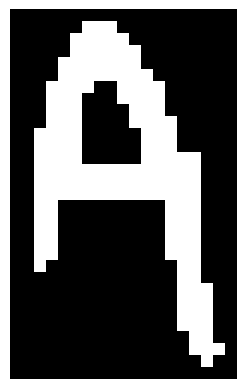

31 19


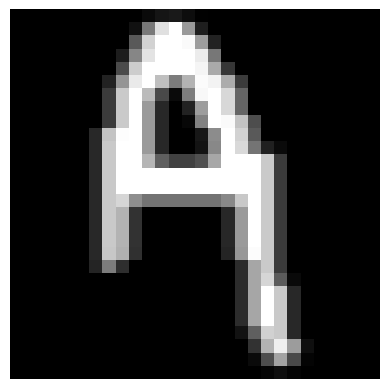

(28, 28)

In [21]:
(x, y, w, h) = cv2.boundingRect(conts[6])
print(x, y, w, h)
img_teste = limiarizacao(gray[y:y+h, x:x+w])
imshow(img_teste)
(a, l) = img_teste.shape
print(a, l)
img_teste2 = redimensiona_img(img_teste, l, a)
imshow(img_teste2)
img_teste2.shape

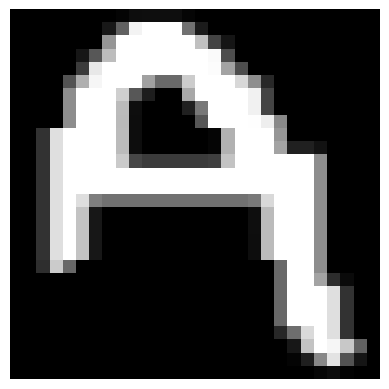

In [22]:
imshow(cv2.resize(img_teste, (28,28)))

## Normalização

In [23]:
def normalizacao(img):
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis=-1)
  return img

In [24]:
img_teste2.shape, normalizacao(img_teste2).shape

((28, 28), (28, 28, 1))

## Processamento das detecções

In [25]:
def processa_caixa(gray, x, y, w, h):
  roi = extra_roi(gray)
  limiar = limiarizacao(roi)
  (a, l) = limiar.shape
  redimensionada = redimensiona_img(limiar, l, a)
  imshow(redimensionada)
  normalizada = normalizacao(redimensionada)
  caracteres.append((normalizada, (x, y, w, h)))

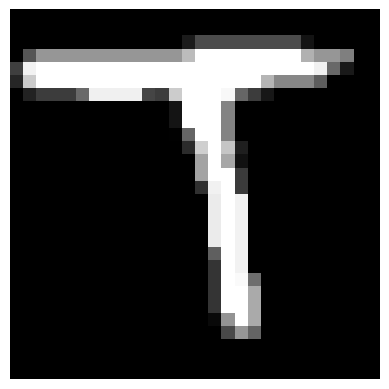

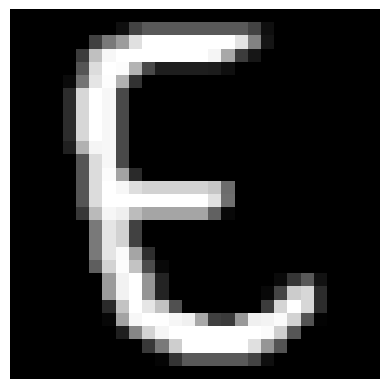

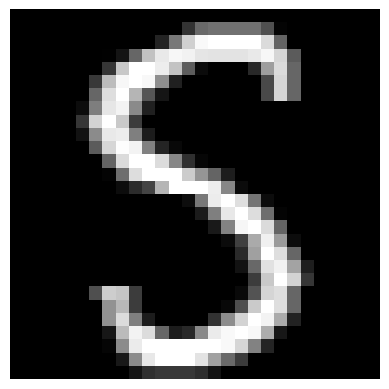

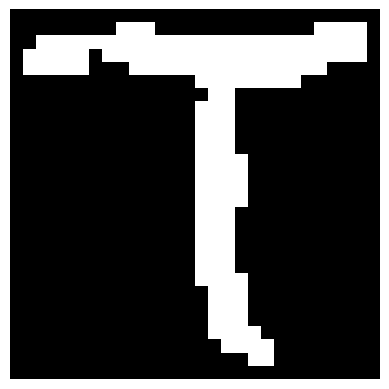

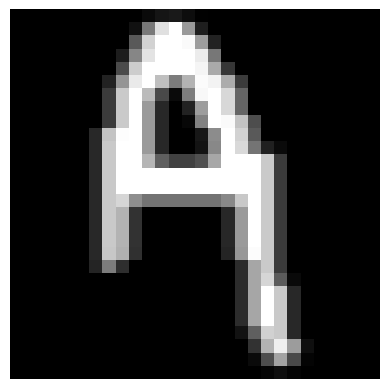

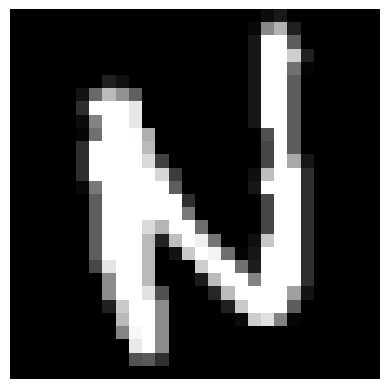

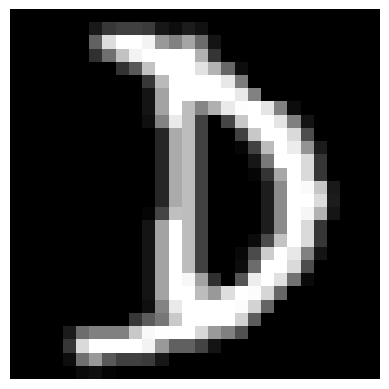

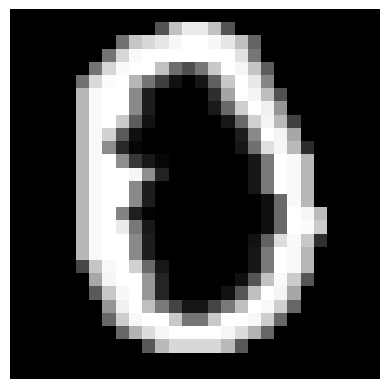

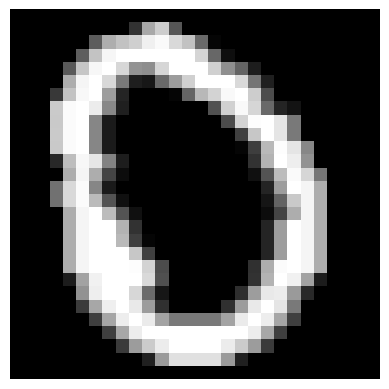

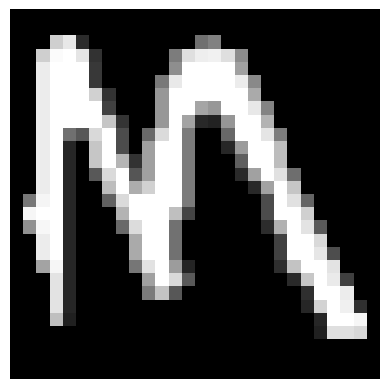

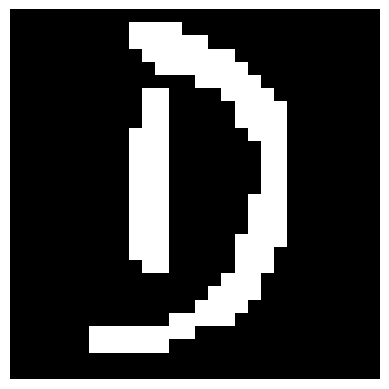

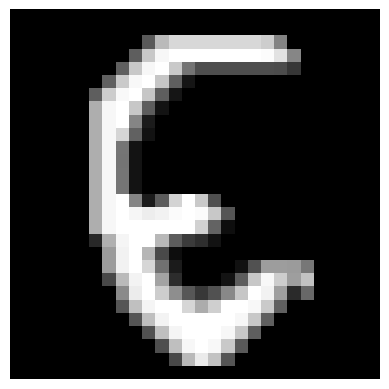

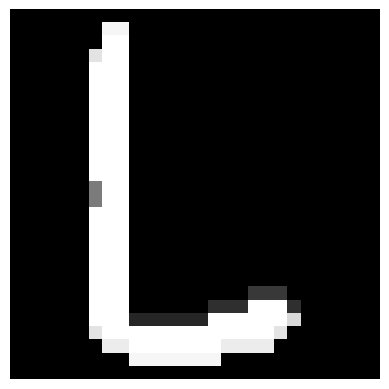

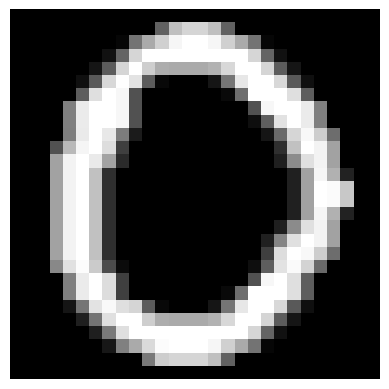

In [26]:
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

In [27]:
caracteres[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
        

In [28]:
caixas = [caixa[1] for caixa in caracteres]
caixas

[(90, 123, 39, 34),
 (140, 123, 24, 34),
 (175, 121, 23, 36),
 (207, 121, 28, 28),
 (247, 121, 19, 31),
 (273, 115, 22, 34),
 (305, 115, 24, 32),
 (335, 117, 20, 26),
 (389, 115, 21, 25),
 (445, 111, 27, 25),
 (473, 111, 17, 23),
 (498, 109, 18, 28),
 (521, 108, 18, 26),
 (552, 105, 18, 27),
 (580, 106, 22, 24)]

In [29]:
caracteres = np.array([c[0] for c in caracteres], dtype='float32')

In [30]:
caracteres

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# Reconhecimento dos caracteres

In [31]:
numeros = "0123456789"
letras = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lista_caracteres = numeros + letras
lista_caracteres = [l for l in lista_caracteres]

In [32]:
print(lista_caracteres)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [33]:
caracteres[0].shape

(28, 28, 1)

In [34]:
caracteres.shape

(15, 28, 28, 1)

In [35]:
previsoes = rede_neural.predict(caracteres)

I0000 00:00:1727535665.780179   12573 service.cc:146] XLA service 0x793a14002f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727535665.780212   12573 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-09-28 15:01:05.787313: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-28 15:01:05.829055: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step


I0000 00:00:1727535666.586335   12573 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [36]:
previsoes

array([[1.21553852e-11, 3.78387721e-09, 5.77770152e-15, 4.02612839e-12,
        7.92009167e-12, 2.35853248e-09, 1.39680974e-15, 5.16502769e-05,
        9.88024662e-11, 1.46070789e-09, 8.59755890e-15, 1.19770857e-20,
        7.62778868e-11, 2.47417104e-11, 1.79557242e-15, 2.30371549e-14,
        1.02476942e-08, 1.88761737e-15, 1.65310945e-10, 1.29769910e-06,
        6.64912125e-10, 3.58249563e-13, 1.08941610e-12, 2.22475424e-12,
        1.40487766e-09, 1.36396239e-09, 3.57448929e-17, 9.12656401e-16,
        5.54701146e-11, 9.99947071e-01, 4.94235941e-09, 3.89618083e-16,
        3.54964539e-12, 4.02155392e-12, 2.17742109e-08, 8.52250562e-11],
       [2.47711363e-08, 5.51755042e-09, 3.92387468e-12, 4.09003127e-13,
        2.17868177e-08, 4.32550842e-05, 1.67083172e-07, 1.00632274e-12,
        9.44162184e-06, 1.60766911e-09, 4.55078510e-12, 2.00497610e-08,
        1.28922955e-04, 1.78894982e-10, 8.64328682e-01, 1.35481372e-01,
        1.41500198e-06, 7.36224970e-12, 4.62037875e-08, 1.01553

In [37]:
previsoes.shape

(15, 36)

In [38]:
caixas

[(90, 123, 39, 34),
 (140, 123, 24, 34),
 (175, 121, 23, 36),
 (207, 121, 28, 28),
 (247, 121, 19, 31),
 (273, 115, 22, 34),
 (305, 115, 24, 32),
 (335, 117, 20, 26),
 (389, 115, 21, 25),
 (445, 111, 27, 25),
 (473, 111, 17, 23),
 (498, 109, 18, 28),
 (521, 108, 18, 26),
 (552, 105, 18, 27),
 (580, 106, 22, 24)]

T  ->  99.99470710754395


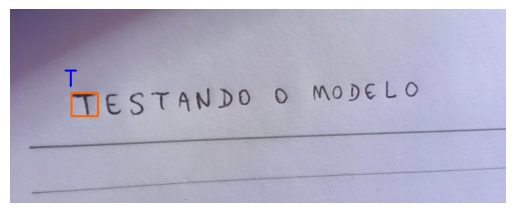

E  ->  86.4328682422638


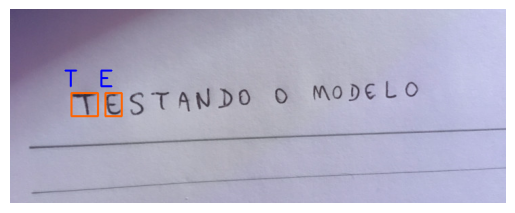

S  ->  85.69701313972473


T  ->  99.95394349098206


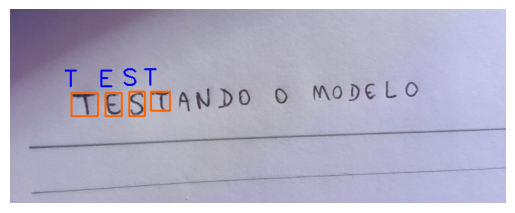

A  ->  99.99959468841553


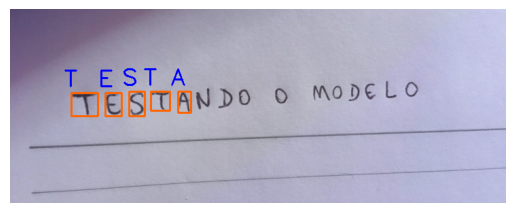

N  ->  99.96786713600159


D  ->  99.98598098754883


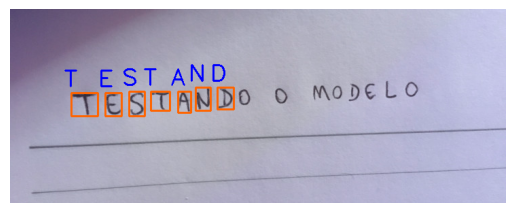

O  ->  89.44571018218994


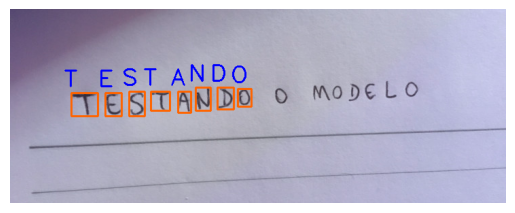

O  ->  41.766852140426636


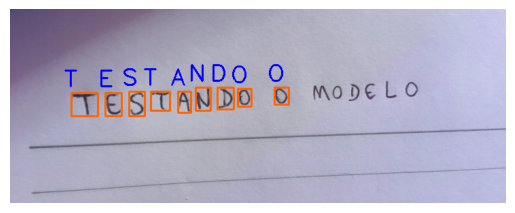

M  ->  99.94392991065979


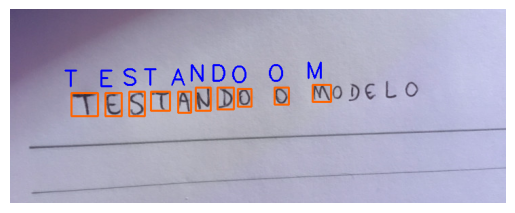

0  ->  98.22916984558105


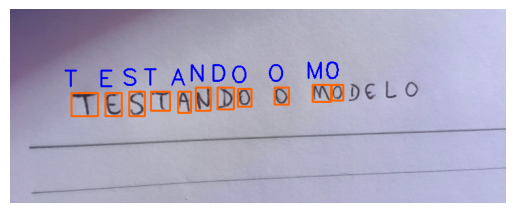

D  ->  90.18949866294861


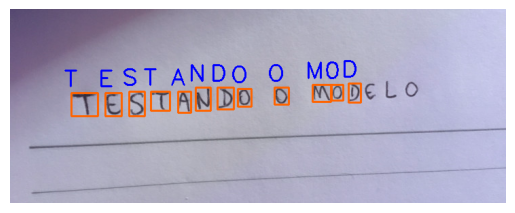

E  ->  99.47272539138794


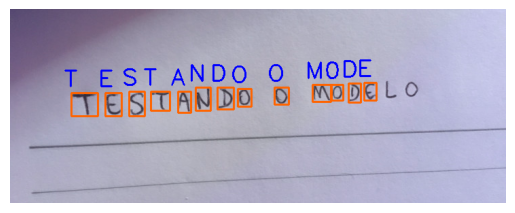

L  ->  99.99994039535522


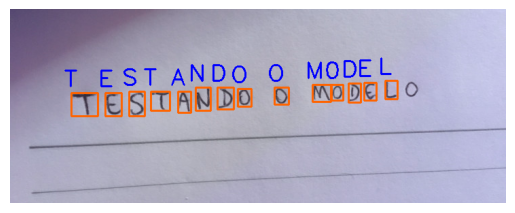

0  ->  78.10502648353577


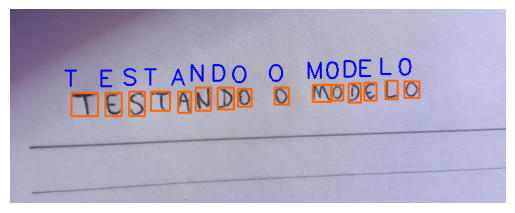

In [39]:
img_cp = img.copy()
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i = np.argmax(previsoes)
  #print(i)
  probabilidade = previsoes[i]
  #print(probabilidade)
  caractere = lista_caracteres[i]
  #print(caractere)

  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_cp, caractere, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(caractere, ' -> ', probabilidade * 100)

  imshow(img_cp)

In [40]:
def extrai_roi(img, margem=2):
  roi = img[y - margem:y + h + margem, x - margem:x + w + margem]
  return roi

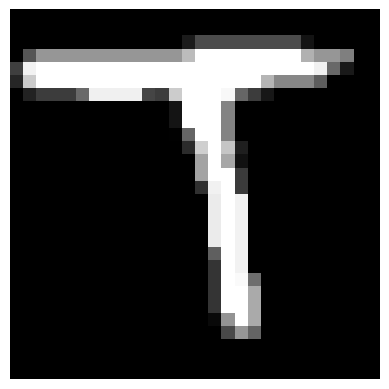

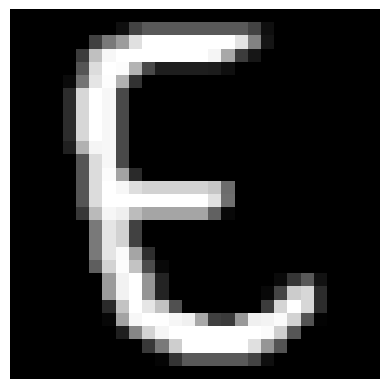

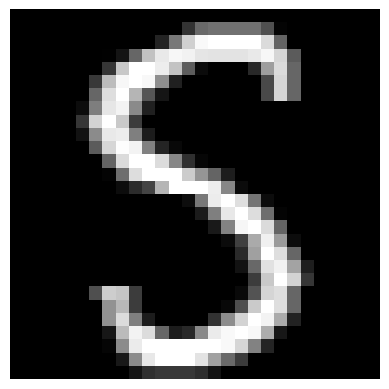

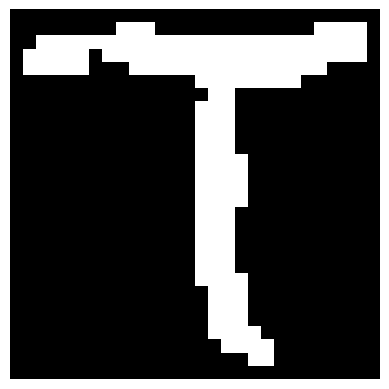

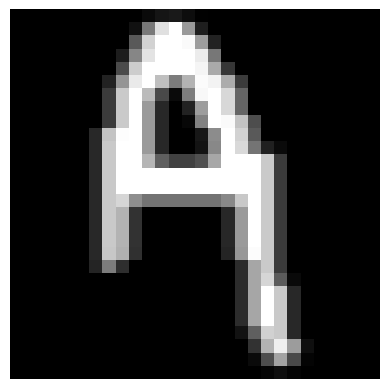

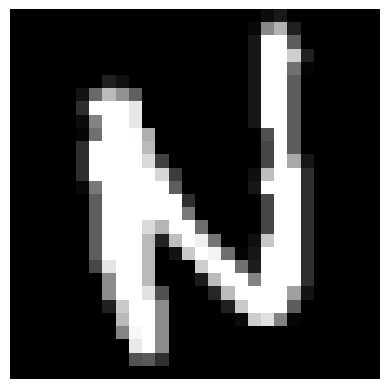

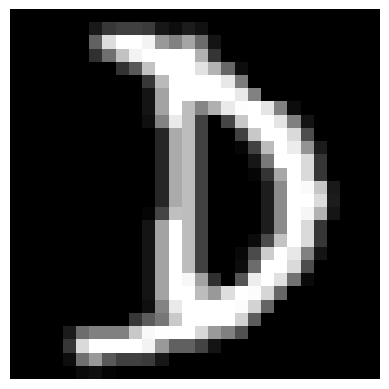

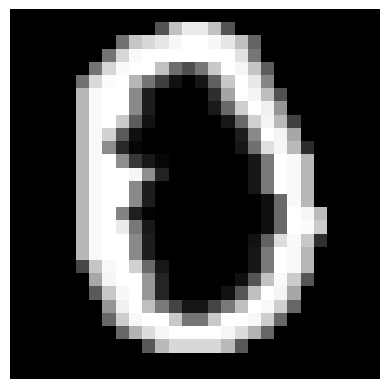

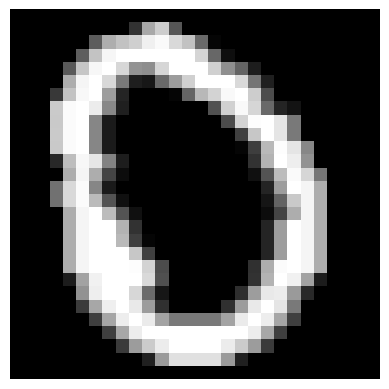

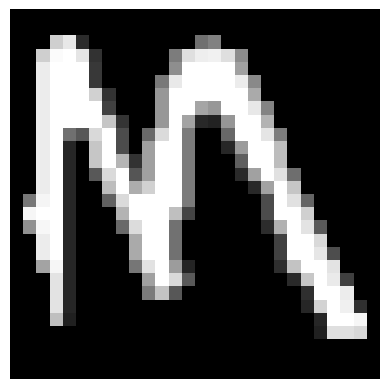

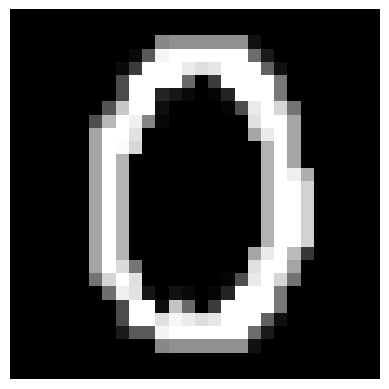

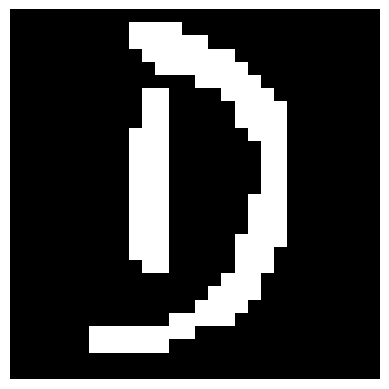

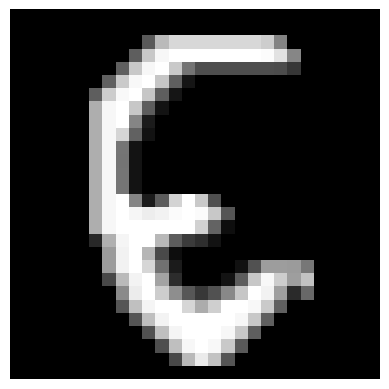

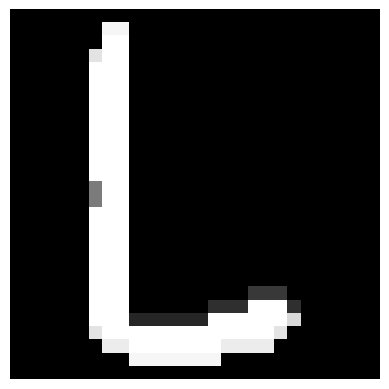

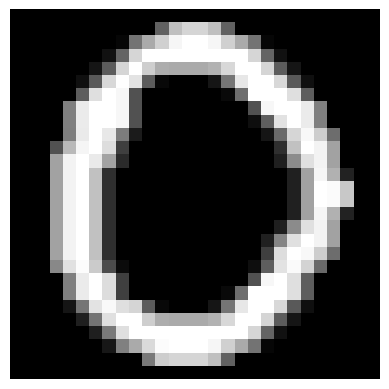

In [41]:
conts = encontrar_contornos(dilatado.copy())
caracteres = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

In [42]:
caixas = [b[1] for b in caracteres]
caracteres = np.array([c[0] for c in caracteres], dtype="float32")
previsoes = rede_neural.predict(caracteres)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


T  ->  99.99470710754395


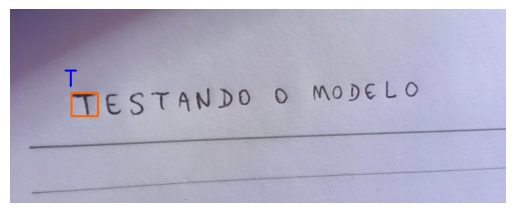

E  ->  86.4328682422638


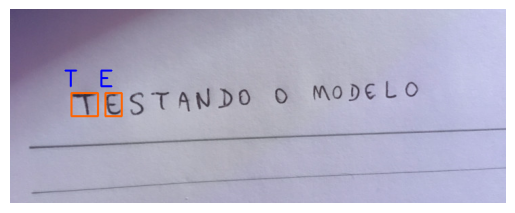

S  ->  85.69701313972473


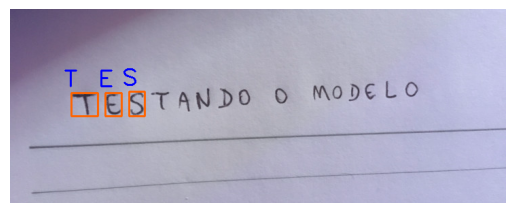

T  ->  99.95394349098206


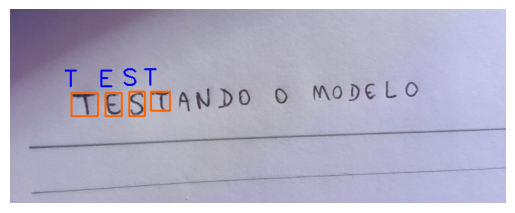

A  ->  99.99959468841553


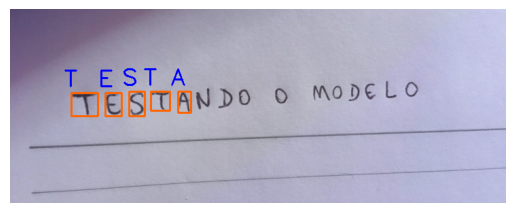

N  ->  99.96786713600159


D  ->  99.98598098754883


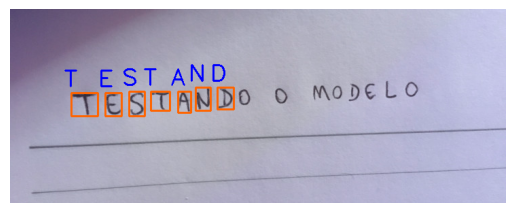

O  ->  89.44571018218994


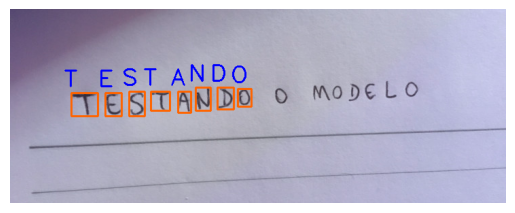

O  ->  41.766852140426636


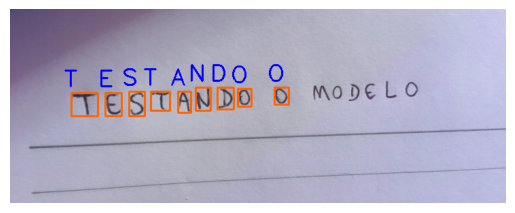

M  ->  99.94392991065979


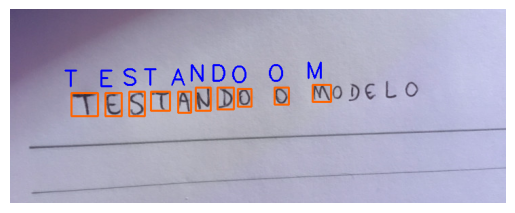

0  ->  98.22916984558105


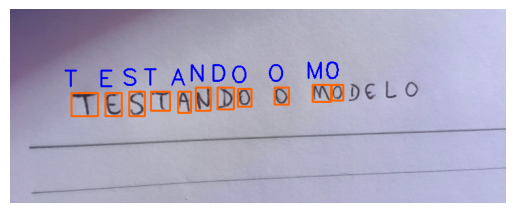

D  ->  90.18949866294861


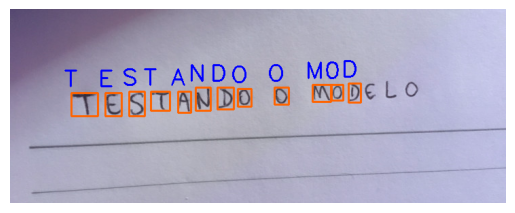

E  ->  99.47272539138794


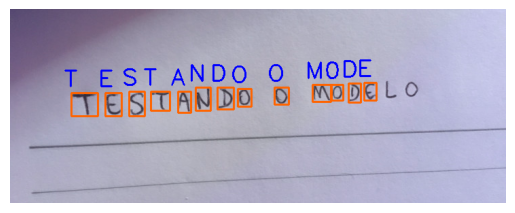

L  ->  99.99994039535522


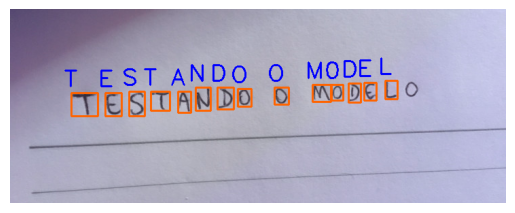

0  ->  78.10502648353577


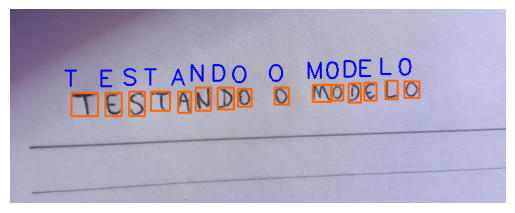

In [43]:
img_cp = img.copy()
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i = np.argmax(previsoes)
  probabilidade = previsoes[i]
  caractere = lista_caracteres[i]

  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_cp, caractere, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(caractere, ' -> ', probabilidade * 100)

  imshow(img_cp)

# Outros testes

In [44]:
def preprocessar_img(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  desfoque = cv2.GaussianBlur(gray, (3, 3), 7)
  bordas = cv2.Canny(desfoque, 40, 150)
  dilatado = cv2.dilate(bordas, np.ones((3,3)))
  return gray, dilatado

In [45]:
def predicao(previsoes, lista_caracteres):
  i = np.argmax(previsoes)
  probabilidade = previsoes[i]
  caractere = lista_caracteres[i]
  return i, probabilidade, caractere

In [46]:
def desenhar_na_img(img_cp, caractere):
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
  cv2.putText(img_cp, caractere, (x - 10, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255), 2)

## O problema do 0 e O, 1 e I, 5 e S

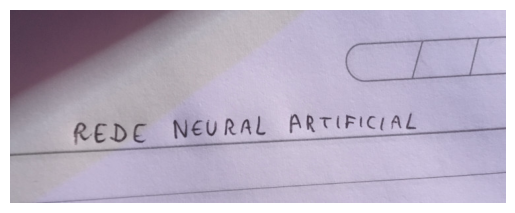

In [47]:
img = cv2.imread('./Imagens/teste_manuscrito02.jpg')
imshow(img)

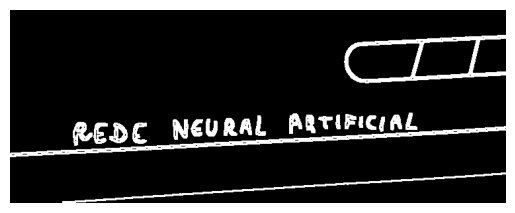

In [48]:
gray, img_processada = preprocessar_img(img)
imshow(gray)
imshow(img_processada)

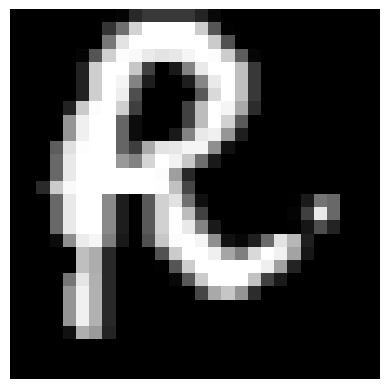

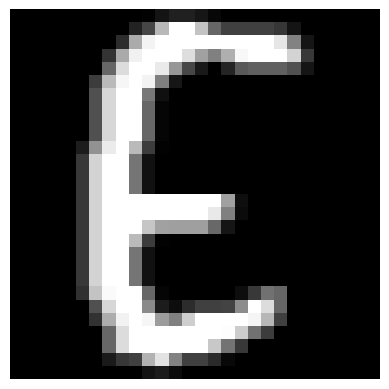

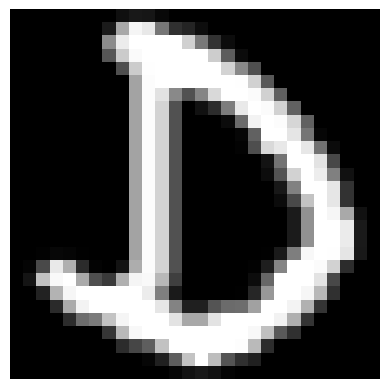

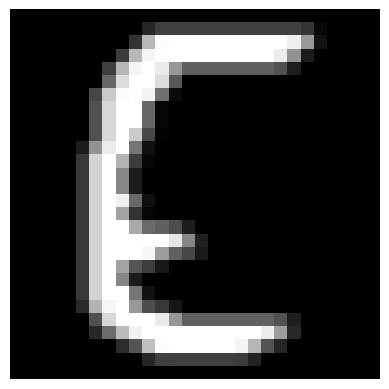

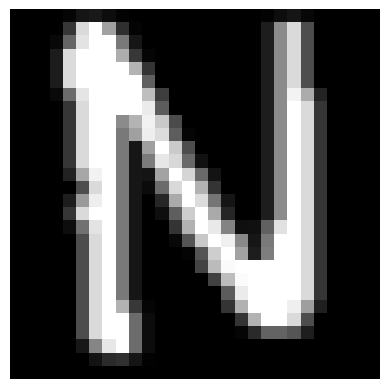

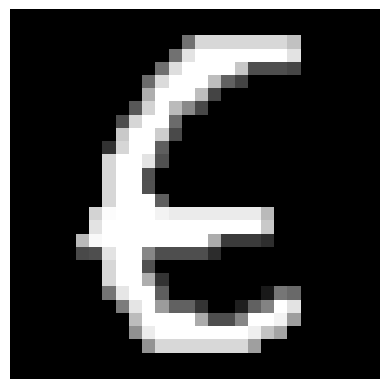

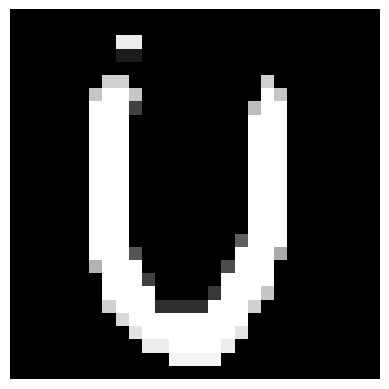

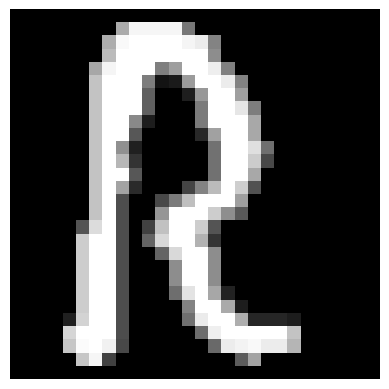

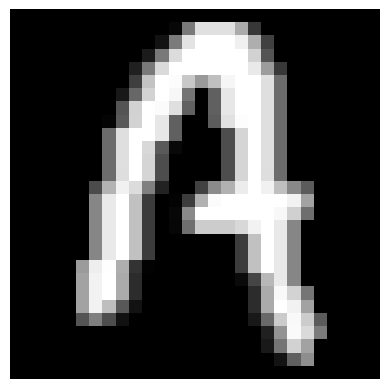

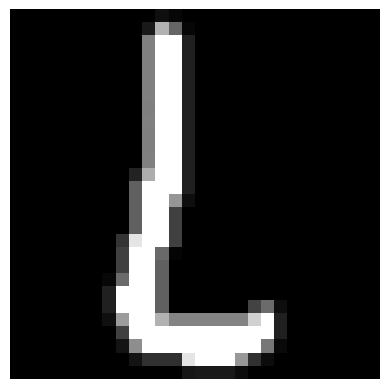

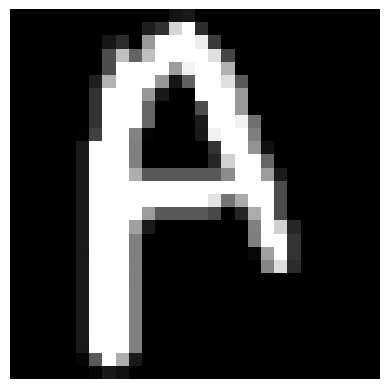

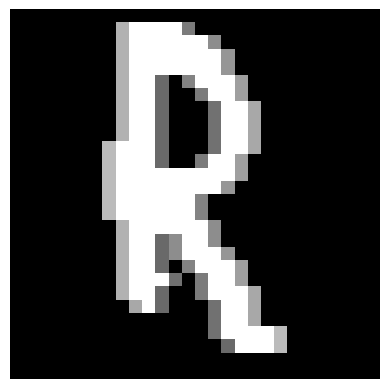

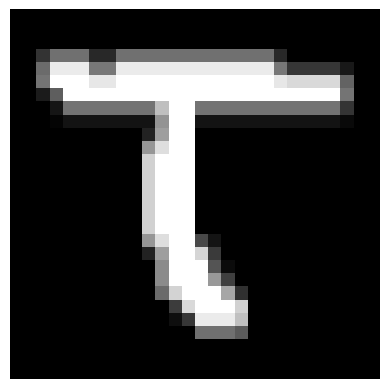

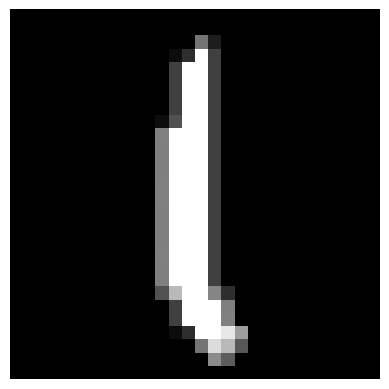

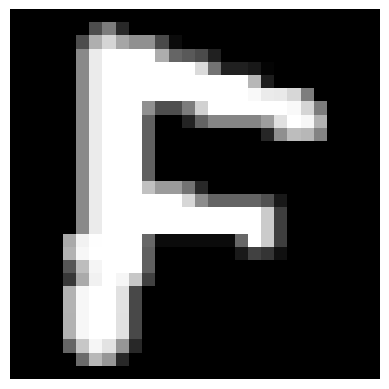

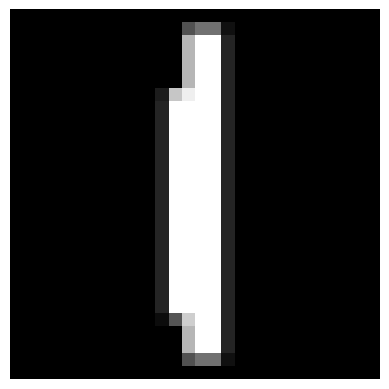

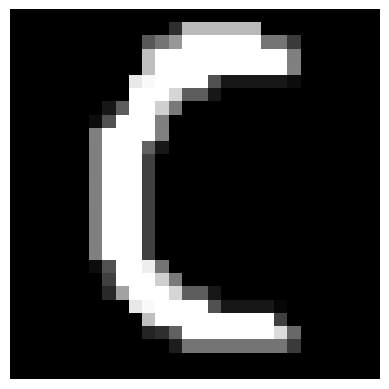

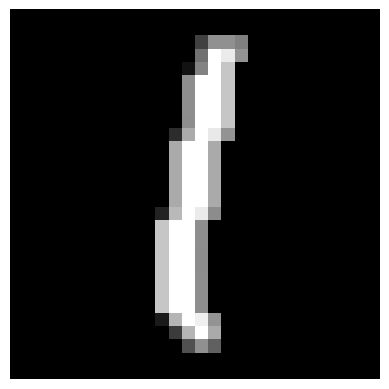

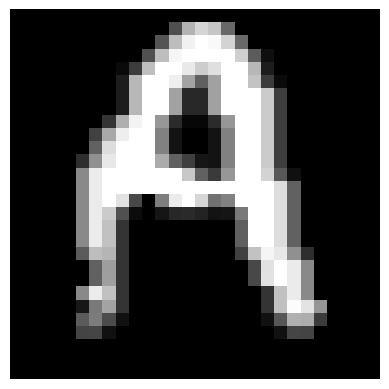

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


In [49]:
conts = encontrar_contornos(img_processada.copy())
caracteres = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

caixas = [b[1] for b in caracteres]
caracteres = np.array([c[0] for c in caracteres], dtype="float32")
previsoes = rede_neural.predict(caracteres)

In [50]:
numeros_2 = "OI234S6789"
letras_2 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lista_caracteres_2 = numeros_2 + letras_2
lista_caracteres_2 = [l for l in lista_caracteres_2]

In [51]:
img_cp = img.copy()
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i, probabilidade, caractere = predicao(previsoes, lista_caracteres_2)
  desenhar_na_img(img_cp, caractere)
imshow(img_cp)

## O problema do texto não detectado

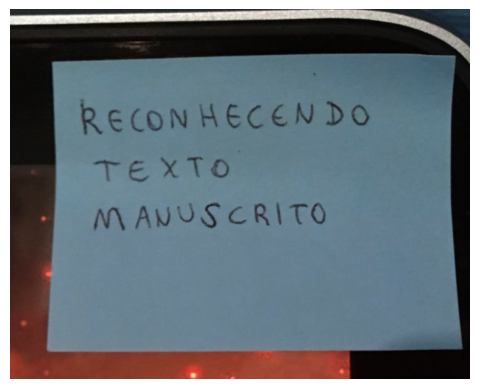

In [52]:
img = cv2.imread('./Imagens/teste_manuscrito03.jpg')
imshow(img)

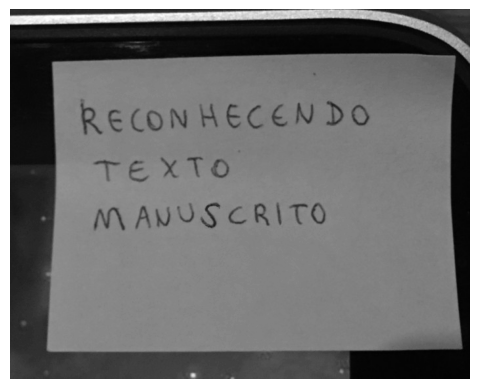

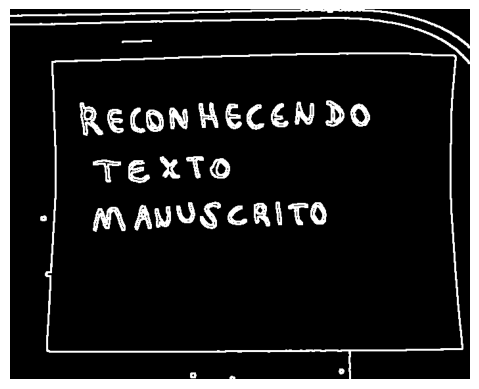

In [53]:
gray, img_processada = preprocessar_img(img)
imshow(gray)
imshow(img_processada)

In [54]:
# RETR_EXTERNAL

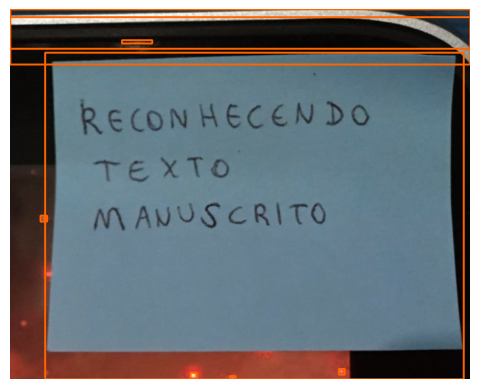

In [55]:
conts = encontrar_contornos(img_processada.copy())
img_cp = img.copy()
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  #if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
  roi = gray[y:y + h, x:x + w]
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
imshow(img_cp)

In [56]:
img.shape

(563, 700, 3)

In [57]:
altura, largura = img.shape[:2]
print(altura, largura)

563 700


In [58]:
contornos_tamanho = sorted(conts, key=cv2.contourArea, reverse=True)

In [59]:
contornos_tamanho

[array([[[500,  66]],
 
        [[499,  67]],
 
        [[435,  67]],
 
        [[434,  68]],
 
        [[397,  68]],
 
        [[396,  69]],
 
        [[363,  69]],
 
        [[362,  70]],
 
        [[321,  70]],
 
        [[320,  71]],
 
        [[292,  71]],
 
        [[291,  72]],
 
        [[256,  72]],
 
        [[255,  73]],
 
        [[234,  73]],
 
        [[233,  74]],
 
        [[203,  74]],
 
        [[202,  75]],
 
        [[167,  75]],
 
        [[166,  76]],
 
        [[138,  76]],
 
        [[137,  77]],
 
        [[ 98,  77]],
 
        [[ 97,  78]],
 
        [[ 68,  78]],
 
        [[ 67,  79]],
 
        [[ 63,  79]],
 
        [[ 63, 101]],
 
        [[ 64, 102]],
 
        [[ 64, 122]],
 
        [[ 65, 123]],
 
        [[ 65, 156]],
 
        [[ 66, 157]],
 
        [[ 66, 184]],
 
        [[ 67, 185]],
 
        [[ 67, 208]],
 
        [[ 68, 209]],
 
        [[ 68, 287]],
 
        [[ 67, 288]],
 
        [[ 67, 304]],
 
        [[ 66, 305]],
 
        [[ 66, 3

In [60]:
for c in contornos_tamanho:
  (x, y, w, h) = cv2.boundingRect(c)

  if (w >= (largura / 2)) and (h >= altura / 2):
    corta = 8
    img_cortada = img[y+corta:y + h - corta, x+corta:x + w - corta]
    imshow(img_cortada)

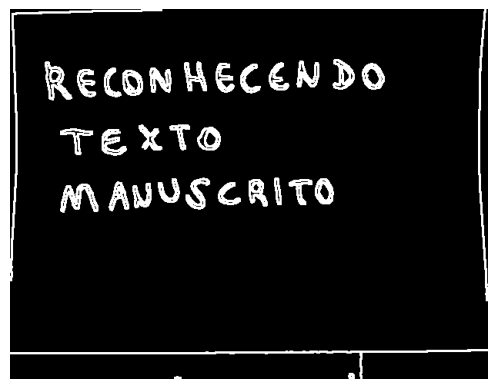

In [61]:
gray, img_processada = preprocessar_img(img_cortada)
imshow(img_processada)

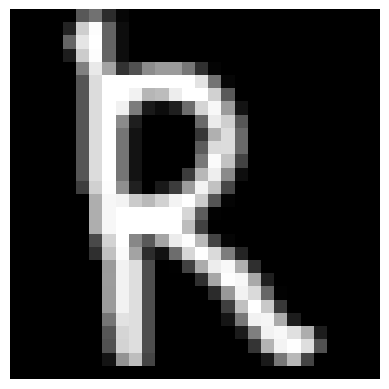

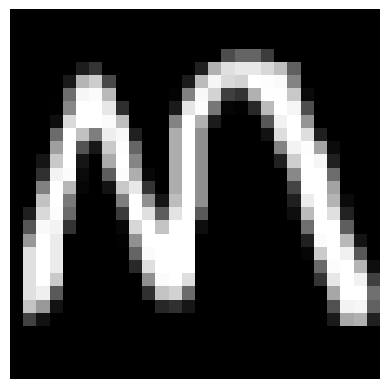

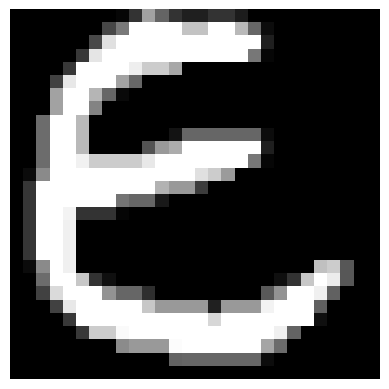

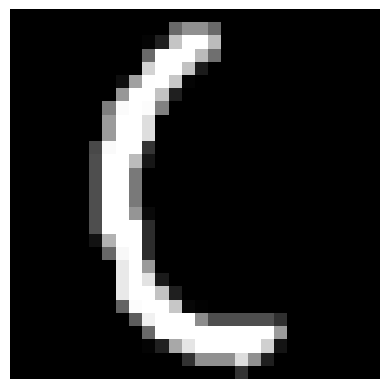

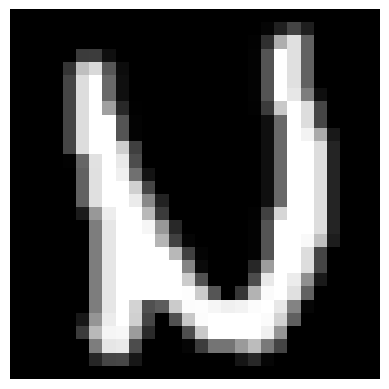

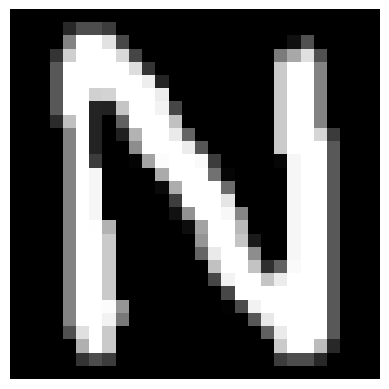

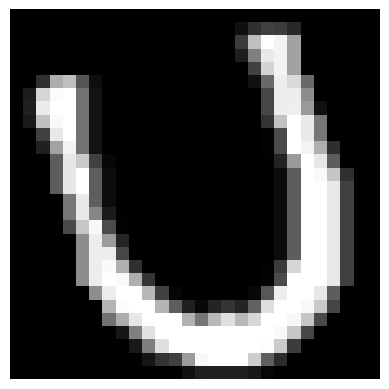

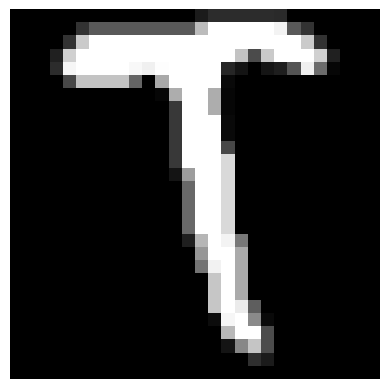

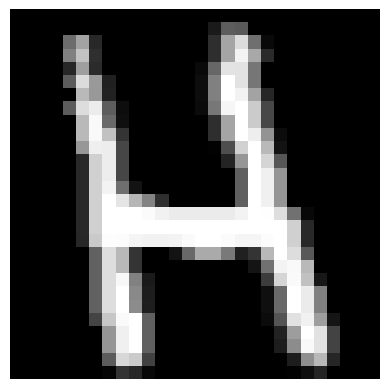

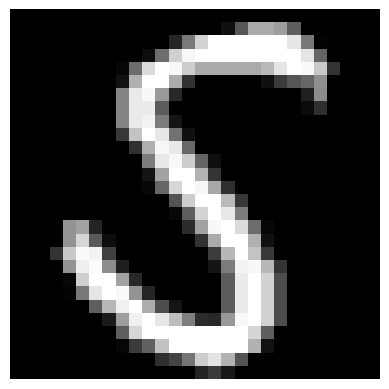

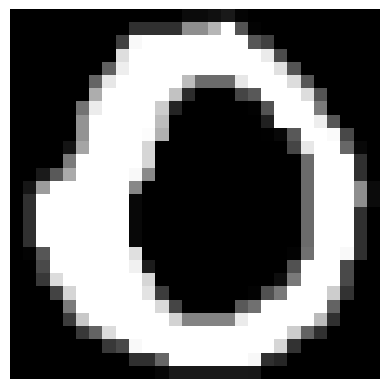

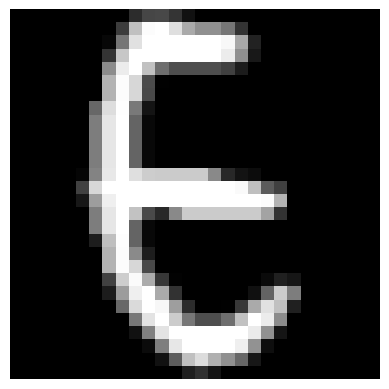

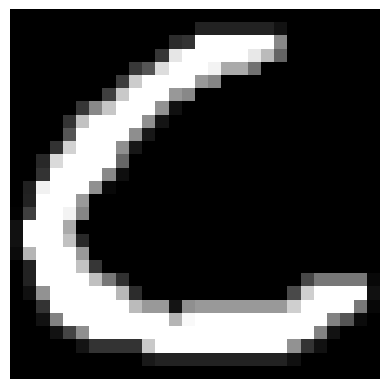

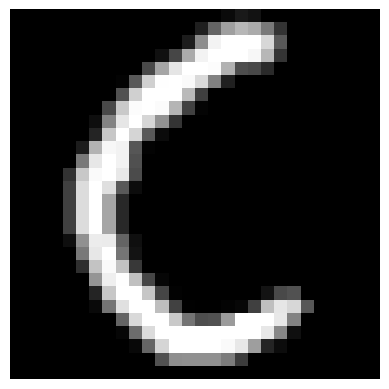

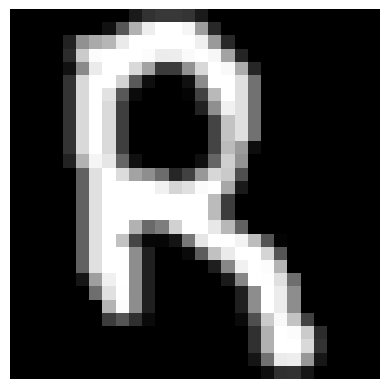

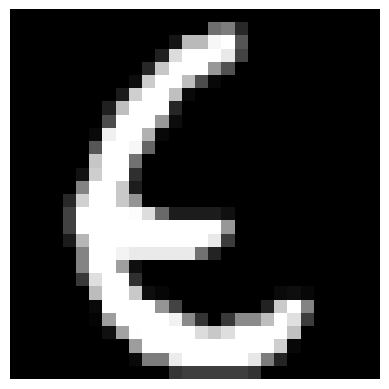

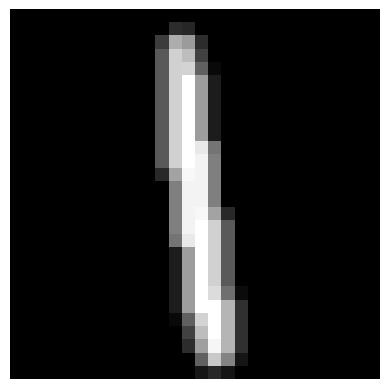

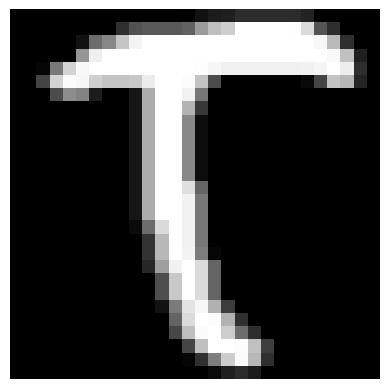

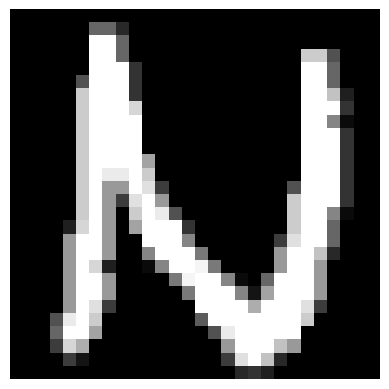

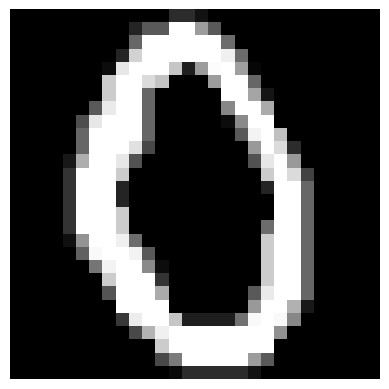

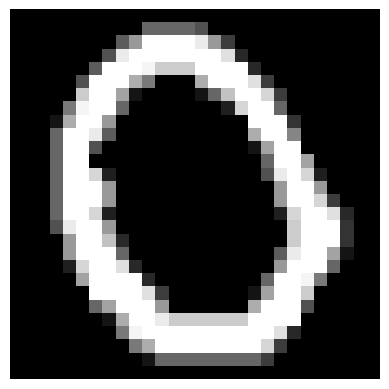

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


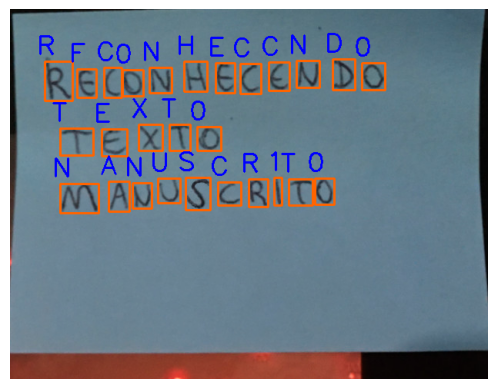

In [62]:
conts = encontrar_contornos(img_processada.copy())
caracteres = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

caixas = [b[1] for b in caracteres]
caracteres = np.array([c[0] for c in caracteres], dtype="float32")

previsoes = rede_neural.predict(caracteres)

img_cp = img_cortada.copy()

# percorre todas as predições e caixas delimitadoras
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i, probabilidade, caractere = predicao(previsoes, lista_caracteres)
  desenhar_na_img(img_cp, caractere)
imshow(img_cp)